**Problem**

You are given a Google Doc like [this one](https://docs.google.com/document/d/e/2PACX-1vRMx5YQlZNa3ra8dYYxmv-QIQ3YJe8tbI3kqcuC7lQiZm-CSEznKfN_HYNSpoXcZIV3Y_O3YoUB1ecq/pub) that contains a list of Unicode characters and their positions in a 2D grid. Your task is to write a function that takes in the URL for such a Google Doc as an argument, retrieves and parses the data in the document, and prints the grid of characters. When printed in a fixed-width font, the characters in the grid will form a graphic showing a sequence of uppercase letters, which is the secret message.

- The document specifies the Unicode characters in the grid, along with the x- and y-coordinates of each character.

- The minimum possible value of these coordinates is 0. There is no maximum possible value, so the grid can be arbitrarily large.

- Any positions in the grid that do not have a specified character should be filled with a space character.

- You can assume the document will always have the same format as the example document linked above.

For example, the simplified example document linked above draws out the letter 'F':

█▀▀▀

█▀▀

█   
*Note that the coordinates (0, 0) will always correspond to the same corner of the grid as in this example, so make sure to understand in which directions the x- and y-coordinates increase.*

**Specifications**

- Your code must be written in Python (preferred) or JavaScript.

- You may use external libraries.

- You may write helper functions, but there should be one function that:

  1. Takes in one argument, which is a string containing the URL for the Google Doc with the input data, AND

  2. When called, prints the grid of characters specified by the input data, displaying a graphic of correctly oriented uppercase letters.

In [ ]:
import requests
from bs4 import BeautifulSoup as Soup
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
response = requests.get('https://docs.google.com/document/d/e/2PACX-1vSHesOf9hv2sPOntssYrEdubmMQm8lwjfwv6NPjjmIRYs_FOYXtqrYgjh85jBUebK9swPXh_a5TJ5Kl/pub?embedded=true')

html_soup = Soup(response.text, 'html.parser')

tables = html_soup.find_all('table')
print(len(tables))

msg_table = tables[0]
rows = msg_table.find_all('tr')


1


In [ ]:
header_row = rows[0]
first_data_row = rows[1]
first_data_row.find_all('td')
[str(x.string) for x in first_data_row.find_all('td')]

['87', '█', '3']

In [ ]:
def parse_row(row):
  return [str(x.string) for x in row.find_all('td')]
list_of_parsed_rows = [parse_row(row) for row in rows[1:]]
print(list_of_parsed_rows)

[['87', '█', '3'], ['23', '░', '2'], ['61', '█', '4'], ['2', '░', '1'], ['65', '█', '4'], ['31', '░', '5'], ['30', '░', '6'], ['20', '█', '4'], ['35', '█', '1'], ['2', '█', '6'], ['52', '█', '1'], ['12', '█', '0'], ['66', '█', '6'], ['69', '█', '4'], ['85', '█', '0'], ['55', '█', '6'], ['77', '█', '3'], ['9', '█', '0'], ['53', '█', '6'], ['5', '█', '3'], ['44', '░', '3'], ['40', '█', '3'], ['14', '█', '0'], ['0', '█', '5'], ['60', '░', '0'], ['14', '█', '3'], ['22', '█', '1'], ['26', '█', '6'], ['66', '█', '2'], ['29', '█', '5'], ['8', '█', '0'], ['80', '░', '5'], ['34', '█', '5'], ['8', '░', '3'], ['87', '█', '1'], ['47', '█', '6'], ['6', '█', '0'], ['45', '█', '1'], ['45', '█', '2'], ['29', '█', '1'], ['65', '█', '6'], ['52', '█', '2'], ['6', '█', '3'], ['2', '░', '4'], ['58', '█', '0'], ['66', '█', '1'], ['16', '█', '0'], ['54', '░', '3'], ['24', '█', '6'], ['67', '░', '1'], ['9', '█', '6'], ['62', '█', '2'], ['44', '█', '0'], ['21', '█', '4'], ['62', '░', '5'], ['15', '█', '6'], ['

In [ ]:
df = DataFrame(list_of_parsed_rows)
df.columns = [str(x.string) for x in rows[0].find_all('td')]
df.head(10)

int_cols = ['x-coordinate', 'y-coordinate']
df[int_cols] = df[int_cols].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   x-coordinate  332 non-null    int64 
 1   Character     332 non-null    object
 2   y-coordinate  332 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.9+ KB


In [ ]:
print(df.index)
print(df['x-coordinate'].value_counts())
print(df['y-coordinate'].max())

RangeIndex(start=0, stop=332, step=1)
x-coordinate
87    7
52    7
1     7
67    7
53    7
     ..
18    2
75    2
25    2
59    2
50    1
Name: count, Length: 84, dtype: int64
6


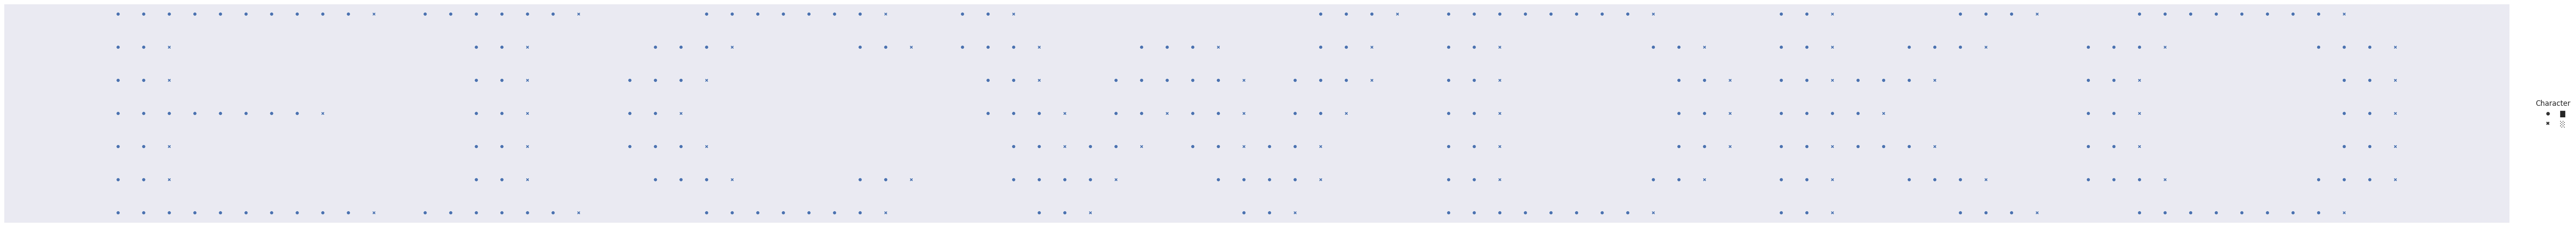

In [ ]:
g = sns.relplot(data=df, x='x-coordinate', y='y-coordinate', kind='scatter', style='Character', height=6, aspect=10)
g.set(xticks=[], yticks=[], xlabel=None, ylabel=None)
g.despine(left=True, bottom=True)

In [ ]:
def get_secret_message(url):
  response = requests.get(url)
  html_soup = Soup(response.text, 'html.parser')

  tables = html_soup.find_all('table')
  len(tables)

  msg_table = tables[0]
  rows = msg_table.find_all('tr')
  def parse_row(row):
    return [str(x.string) for x in row.find_all('td')]
  list_of_parsed_rows = [parse_row(row) for row in rows[1:]]
  df = DataFrame(list_of_parsed_rows)
  df.columns = [str(x.string) for x in rows[0].find_all('td')]
  int_cols = ['x-coordinate', 'y-coordinate']
  df[int_cols] = df[int_cols].apply(pd.to_numeric)
  g = sns.relplot(data=df, x='x-coordinate', y='y-coordinate', kind='scatter', style='Character', height=6, aspect=10)
  g.set(xticks=[], yticks=[], xlabel=None, ylabel=None)
  g.despine(left=True, bottom=True)
  return g


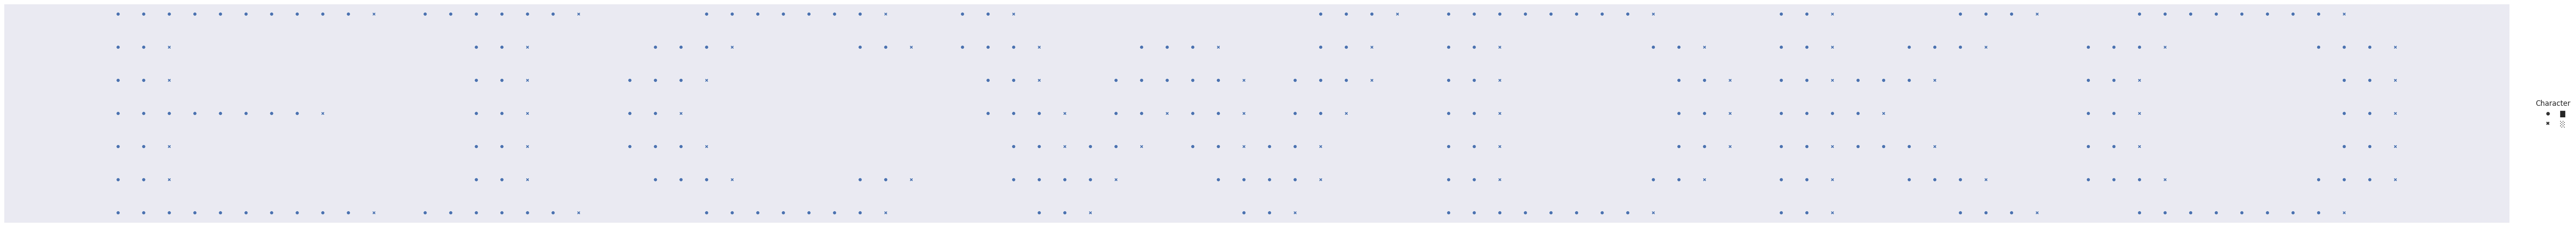

In [ ]:
get_secret_message('https://docs.google.com/document/d/e/2PACX-1vSHesOf9hv2sPOntssYrEdubmMQm8lwjfwv6NPjjmIRYs_FOYXtqrYgjh85jBUebK9swPXh_a5TJ5Kl/pub?embedded=true')